In [3]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 


# change dpi of plots to 300
plt.rcParams['figure.dpi'] = 150

ModuleNotFoundError: No module named 'seaborn'

In [4]:

pwd = os.getcwd()
print(pwd)
os.makedirs(pwd + '/Lab9/', exist_ok=True)



url = 'http://intranet.daiict.ac.in/~daiict_nt01/Lecture/Arnab%20Kumar/Winter/CS302/lab_work/NIFTY/'
folder_path = pwd + '/Lab9/'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
links = soup.find_all('a')

for link in links:
    file_name = link['href']
    if file_name.endswith('/'):
        continue
    file_url = url + file_name
    file_response = requests.get(file_url)
    with open(os.path.join(folder_path, file_name), 'wb') as f:
        f.write(file_response.content)



NameError: name 'os' is not defined

In [ ]:
pwd = os.getcwd()
print(pwd)
path = pwd + '/Lab5/'

/Users/divya/Documents/Semester-6/Modelling and Simulation/Labs


In [ ]:
# read all files ending with .dat in folder pwd + Lab5/Q1 

curr_dir = pwd + '/Lab9/'
files = os.listdir(curr_dir)
files = [file for file in files if file.endswith('.dat')]
print(files)



['wiene.dat', 'price.dat', 'trade.dat', 'gauss.dat', 'fluct.dat']


In [ ]:
dict_df = {}

for file in files:
    data = pd.read_csv(curr_dir + '/' + file, sep = '\s+', header = None)
    
    dict_df[file] = data
    
    data.head()
    
    


/var/folders/rt/4pmvhmbn1mqgy1wn6v12t1xr0000gn/T/ipykernel_4622/3693110413.py:18: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(y)-1000, max(y)+5000)


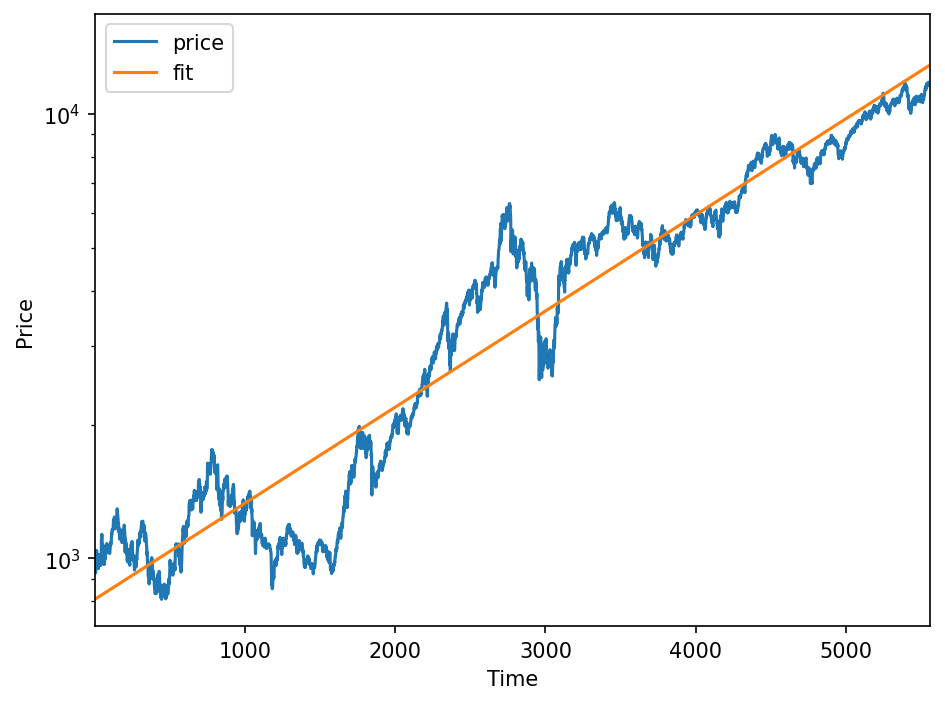

m = 0.0004977992267249239
b = 6.696070413581985


In [ ]:
import numpy as np
import scipy.optimize as opt

x = dict_df['price.dat'][1]
y = dict_df['price.dat'][2]
logy = np.log(y)
m, b = np.polyfit(x, logy, 1)
plt.plot(x, y, label='price')
plt.plot(x, np.exp(m*x + b), label='fit')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.yscale('log')

# make plot tight and show it
plt.tight_layout()
plt.xlim(min(x), max(x))
plt.ylim(min(y)-1000, max(y)+5000)
plt.savefig('figure1.png')
plt.show()


# print m and b
print('m =', m)
print('b =', b)




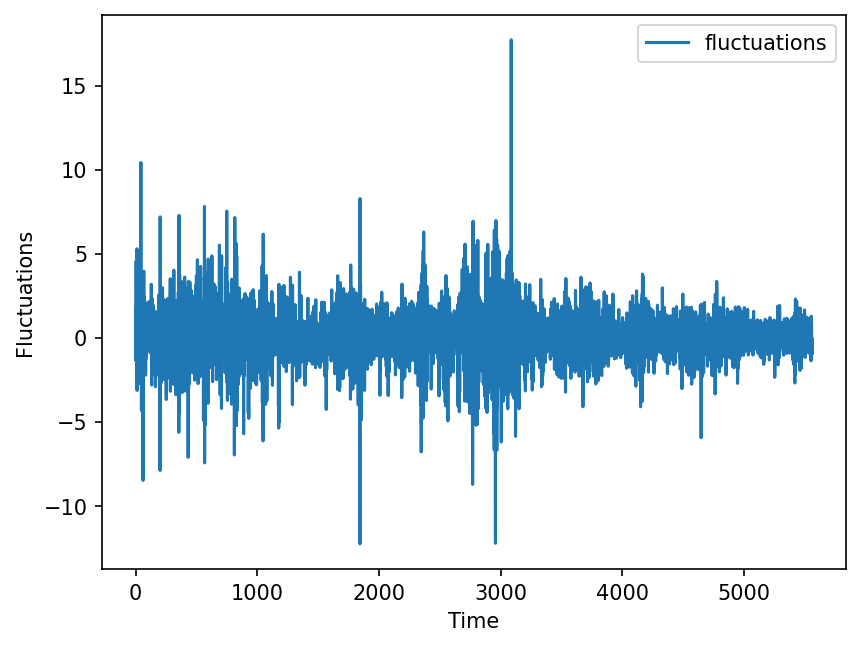

In [ ]:
# plot fluctuations column 2 vs 1

# 20x10 figure size
# plt.figure(figsize=(20,12))
x = dict_df['fluct.dat'][1]
y = dict_df['fluct.dat'][2]

plt.plot(x, y, label='fluctuations')
plt.xlabel('Time')
plt.ylabel('Fluctuations')
plt.legend()
plt.savefig('figure2_Fluctuations.png')
plt.show()



mu = -0.9428376190127459
std = 1.4948646836971844


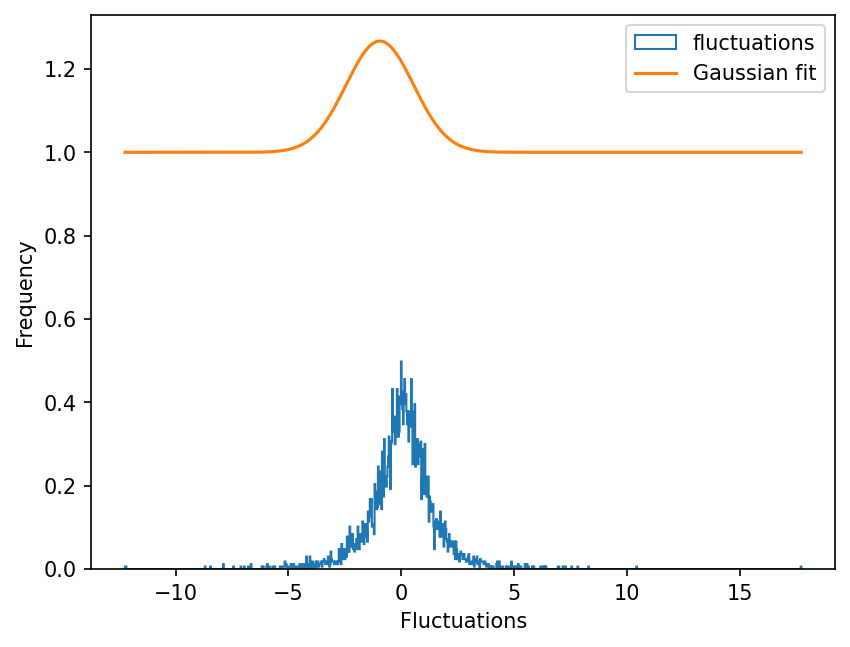

In [ ]:

from scipy.stats import norm
# plt.figure(figsize=(20, 12))

x = dict_df['fluct.dat'][1]
y = dict_df['fluct.dat'][2]

# Subtract 1 from y_copy = y
y_copy = y - 1

# plot histogram
plt.hist(y, bins=1000, label='fluctuations', density=True, histtype='step')

# fit Gaussian distribution
mu, std = norm.fit(y_copy)
x_values = np.linspace(min(y), max(y), 10000)
y_values = norm.pdf(x_values, mu, std)

print('mu =', mu)
print('std =', std)
# plot fitted distribution
plt.plot(x_values, y_values+1, label='Gaussian fit')

plt.xlabel('Fluctuations')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('gaussian_fit.png')
plt.show()


y = 1.0008631126858745 x + 3754.427440524341
y = 0.00037468340298729046 x + 3.5745437154066413


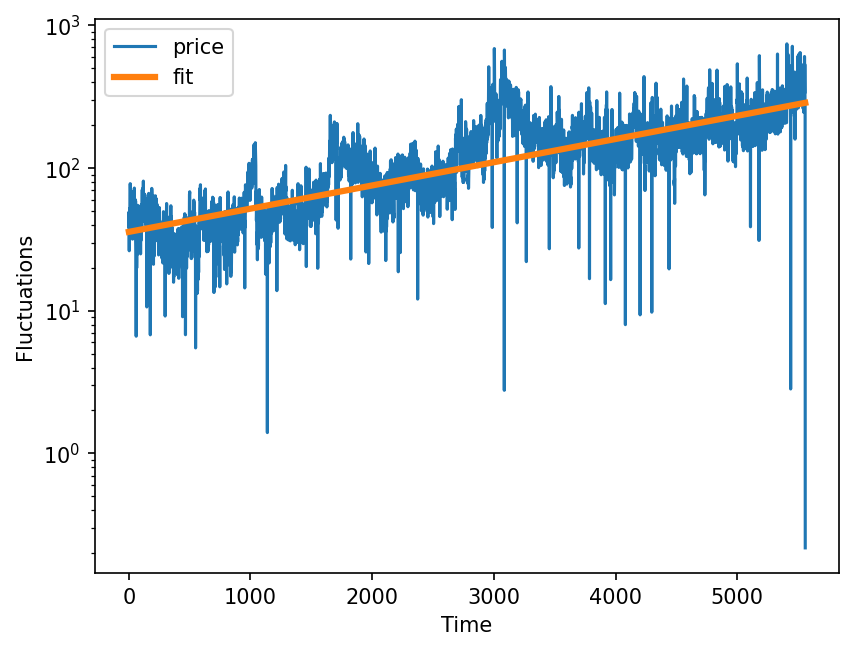

In [ ]:
# plt.figure(figsize=(20, 12))
x = dict_df['trade.dat'][1]
y = dict_df['trade.dat'][2]

logy = np.log(y)
m, b = np.polyfit(x, logy, 1)
plt.plot(x, y, label='price')
plt.plot(x, np.exp(m*x + b), label='fit',linewidth = 3)
plt.xlabel('Time')
plt.ylabel('Fluctuations')
plt.yscale('log')
plt.legend()
plt.savefig('fluctuations_time.png')
print('y =', 10**m, 'x +', 10**b)

print('y =', m, 'x +', b)

plt.show()


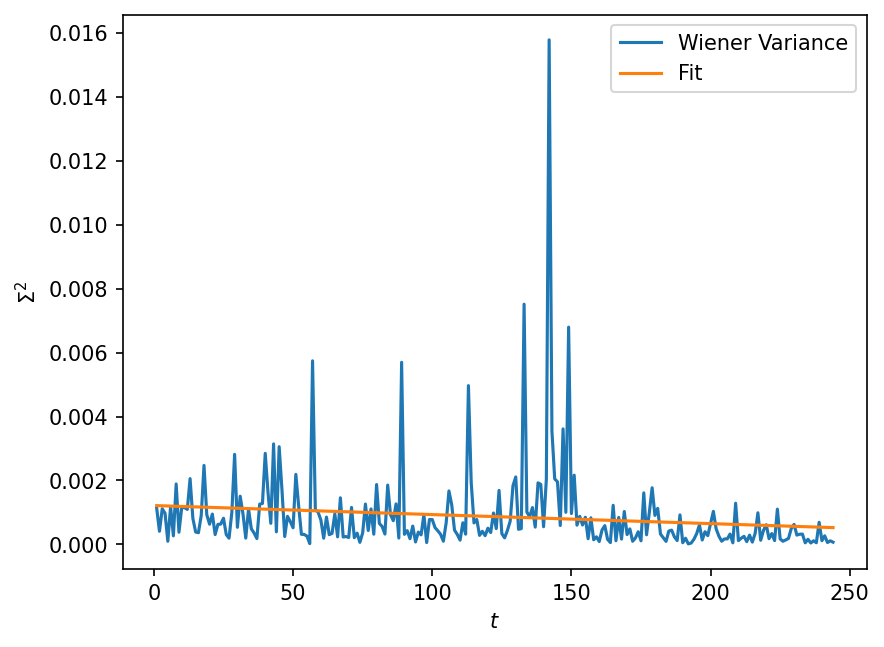

In [ ]:


x = dict_df['wiene.dat'][0]
y = dict_df['wiene.dat'][3]



m, b = np.polyfit(x, y, 1)
plt.plot(x, y, label='Wiener Variance')
# plt.plot(x2, y2, label='price_a')
plt.plot(x, (m*x + b), label='Fit')
plt.xlabel('Time')
# ylabel is sigma-square
plt.ylabel('$\Sigma^2$')
# xlabel is tau
plt.xlabel('$t$')
plt.legend()

# plt.tight_layout()
plt.savefig('wiener_variance.png')
plt.show()
# fit a line using least squares method and plot it


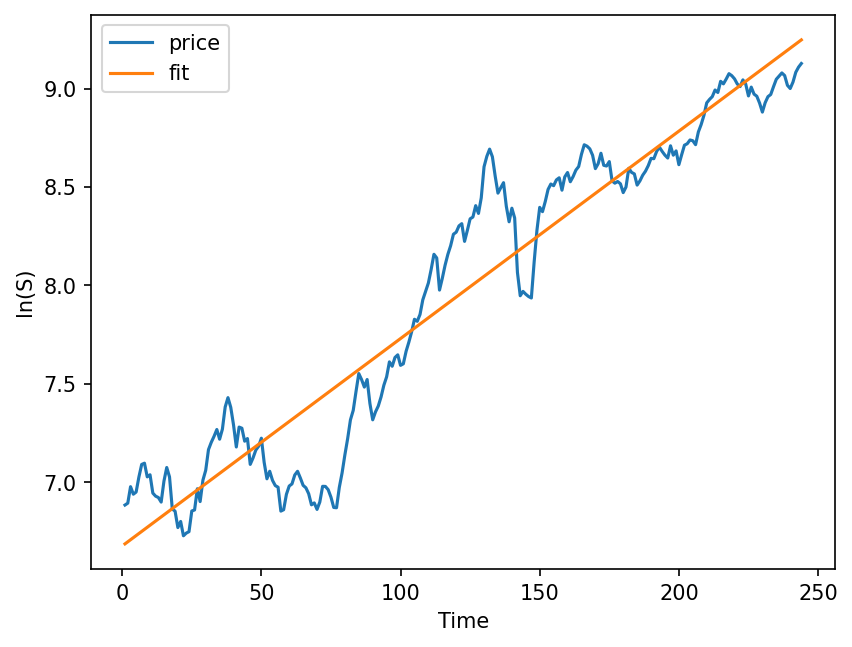

In [ ]:

x = dict_df['wiene.dat'][0]
y = dict_df['wiene.dat'][2]
y2 = dict_df['price.dat'][2]
x2 = dict_df['price.dat'][0]
y2 = np.log(y2)
x2 = x2/22
logy = (y)


m, b = np.polyfit(x, logy, 1)
plt.plot(x, logy,label='price')
# plt.plot(x2, y2, label='price_a')
plt.plot(x, (m*x + b), label='fit')
plt.xlabel('Time')
plt.ylabel('ln(S)')
plt.legend()

# plt.tight_layout()
plt.savefig('lns_time.png')
plt.show()  
# fit a line using least squares method and plot it



